In [1]:
# find parts with different colors on the picture
# and show them with different colors

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_path = "images/Diamond.jpeg"

img = cv2.imread(img_path)

In [3]:
# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
# convert to binary
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [5]:
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

In [6]:
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [7]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

In [8]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

In [9]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

In [10]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

In [11]:
# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

In [12]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]


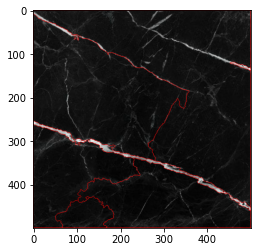

In [13]:
plt.imshow(img)
plt.show()

In [14]:
# save image to desktop
cv2.imwrite('Diamond1.jpeg', img)

True